# **FoodHub**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Google Colab Run
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the path
path = '/content/drive/My Drive/Data Science/foodhub.csv'
# Read the data
df = pd.read_csv(path) 
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Checking for missing values in the data
df.isnull().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# Get the summary statistics of the numerical data
df['food_preparation_time'].describe() 

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [ ]:
df['rating'].value_counts() 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## unique Customer ID

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ##  find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ##  find out  number of  unique cuisine type

14

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Chinese'),
  Text(4, 0, 'Mexican'),
  Text(5, 0, 'Indian'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Thai'),
  Text(9, 0, 'French'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Korean'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

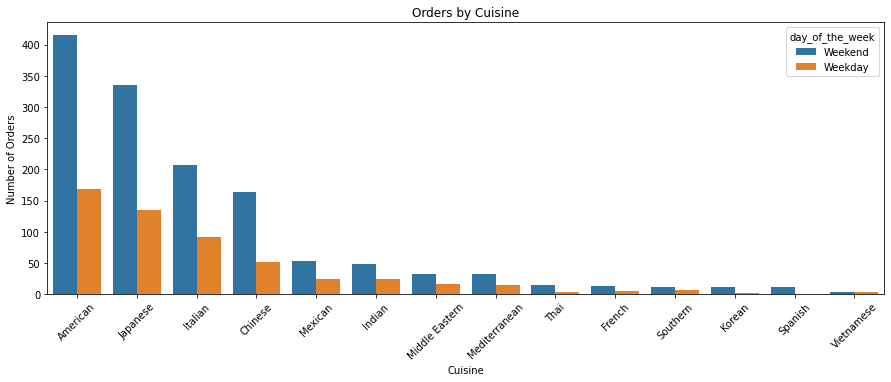

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().sort_values(ascending=False).index, hue ='day_of_the_week')
plt.title('Orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)


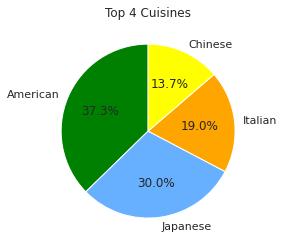

In [ ]:
# Define data for the pie chart
sizes = [37.3, 30, 19, 13.7]
labels = ['American', 'Japanese', 'Italian', 'Chinese']
colors = ['green','#66b0ff','orange', 'yellow']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Top 4 Cuisines")

# Show the chart
plt.show()

#### Cost of the order

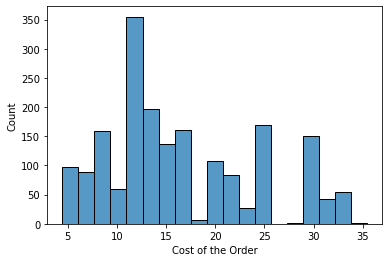

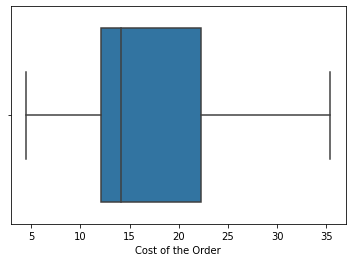

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.xlabel('Cost of the Order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.xlabel('Cost of the Order')
plt.show() 
print(df['cost_of_the_order'].describe())

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ##  check unique values for the 'day_of_the_week' column

2

Text(0.5, 0, 'Day of the Week')

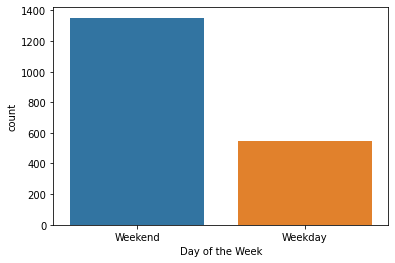

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week')
plt.xlabel('Day of the Week')
 ##  plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() ##  check unique values for the 'rating' column

4

<AxesSubplot:xlabel='rating', ylabel='count'>

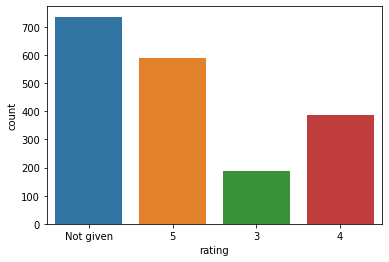

In [ ]:
sns.countplot(data = df, x = 'rating') ##  plot bar graph for 'rating' column

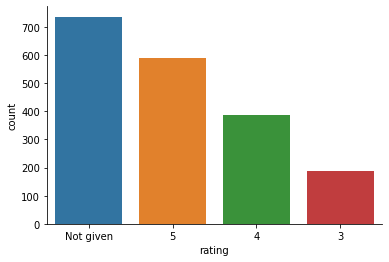

In [ ]:
# calculate counts of each rating
rating_counts = df['rating'].value_counts(ascending=False)

# create countplot with ratings ordered by count in descending order
sns.countplot(data=df, x='rating', order=rating_counts.index)
sns.set_style('white')
sns.despine()

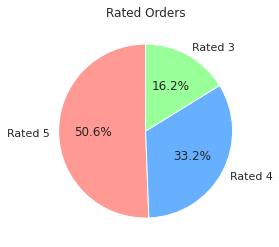

In [ ]:

# Define data for the pie chart
sizes = [50.6, 33.2, 16.2]
labels = ['Rated 5', 'Rated 4', 'Rated 3']
colors = ['#ff9994','#66b0ff','#99ff99']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Rated Orders")

# Show the chart
plt.show()


#### Food Preparation time

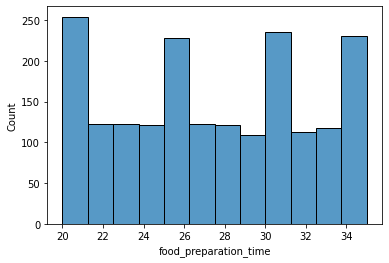

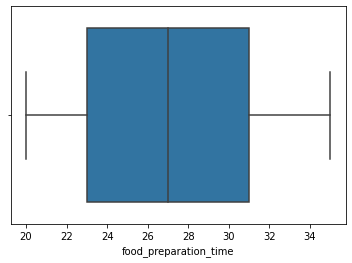

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


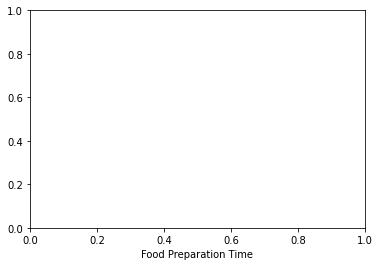

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ##  plot the histogram for the cost of order
plt.show()
plt.xlabel('Food Preparation Time')
sns.boxplot(data=df,x='food_preparation_time') ##  plot the boxplot for the cost of order
plt.show()
plt.xlabel('Food Preparation Time')
print(df['food_preparation_time'].describe())

#### Delivery time

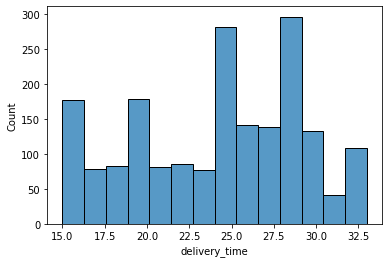

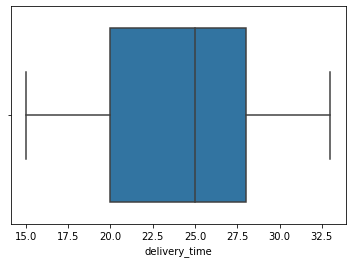

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


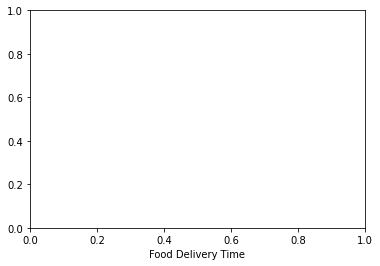

In [ ]:
sns.histplot(data=df,x='delivery_time') ##  plot the histogram for the delivery time
plt.show()
plt.xlabel('Food Delivery Time')
sns.boxplot(data=df,x='delivery_time') ##  plot the boxplot for the delivery time
plt.show()
plt.xlabel('Food Delivery Time')
print(df['delivery_time'].describe())

In [ ]:
# Get top 5 restaurants with highest number of orders
top5 = df['restaurant_name'].value_counts().head(5)
print(top5) ## 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


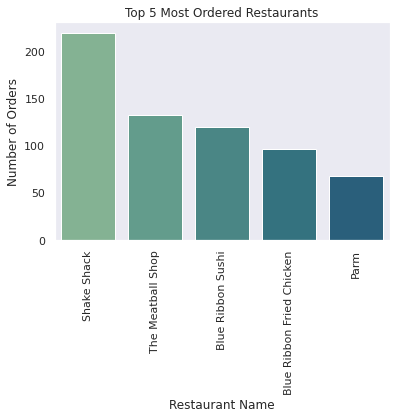

In [ ]:
# Get the top 5 most ordered restaurants
top_restaurants = df['restaurant_name'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 restaurants
top_restaurants_data = df[df['restaurant_name'].isin(top_restaurants)]

# Plot the count plot using seaborn
sns.set(style="darkgrid")
sns.set_palette("crest")
ax = sns.countplot(x="restaurant_name", data=top_restaurants_data, order=top_restaurants)

# Set the x-axis label rotation angle to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid(False, axis='both', which='both')
# Set the plot title and labels
plt.title('Top 5 Most Ordered Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')



# Show the plot
plt.show()

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique() ##  check unique values for the cuisine type on weekend

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

In [ ]:
weeknd_cuisine = df.loc[df['day_of_the_week'] == 'Weekend', 'cuisine_type'].value_counts()
print(weeknd_cuisine)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ##get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ##function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [ ]:
# Get the counts of  each customer_id
top_3_customers = df['customer_id'].value_counts().head(3)
print(top_3_customers)  #get the top 5 cmost frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


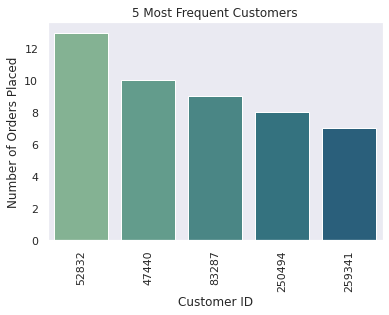

In [ ]:
# Get the top 5 most frequeny customers
top3customers = df['customer_id'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 restaurants
top3customers_data = df[df['customer_id'].isin(top3customers)]

# Plot the count plot using seaborn
sns.set(style="darkgrid")
sns.set_palette("crest")
ax = sns.countplot(x="customer_id", data=top3customers_data, order=top3customers)

# Set the x-axis label rotation angle to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid(False, axis='both', which='both')
# Set the plot title and labels
plt.title('5 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders Placed')



# Show the plot
plt.show()

### Multivariate Analysis

#### Cuisine vs Cost of the order

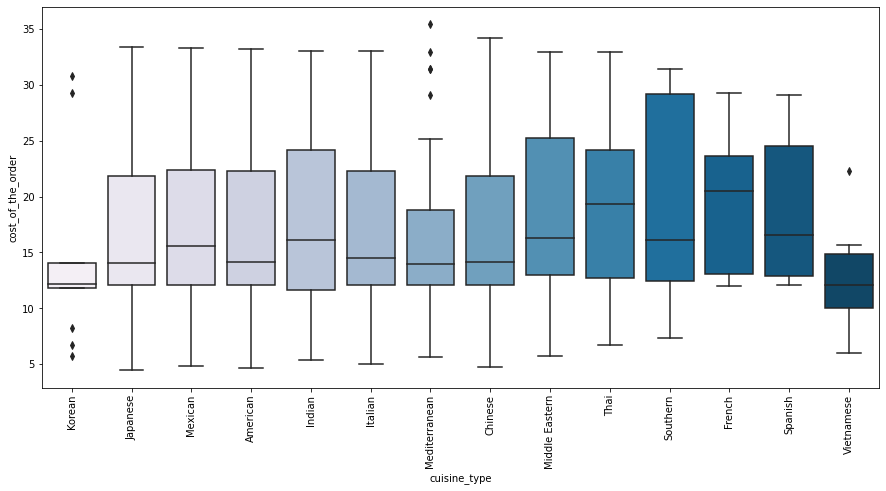

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 90)
plt.show()

#### Cuisine vs Food Preparation time

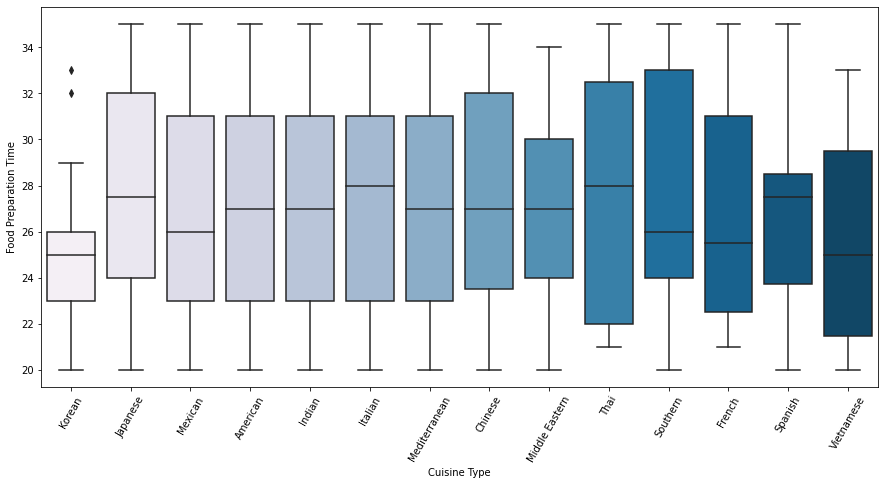

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time') ##  visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

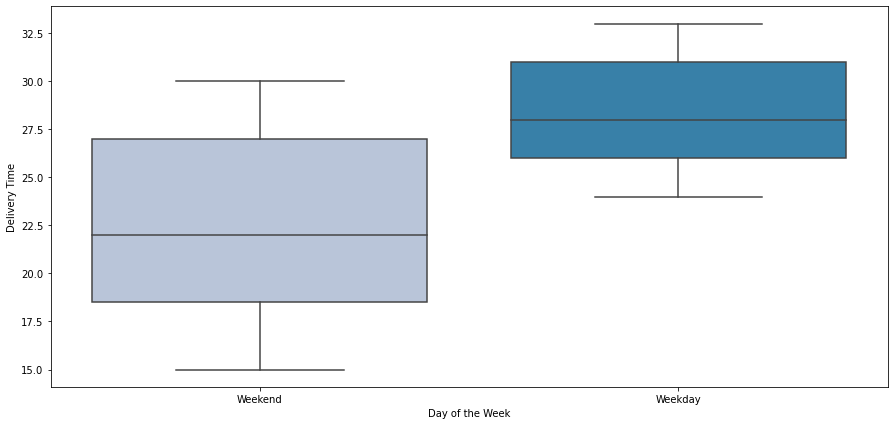

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(y = "delivery_time", x = "day_of_the_week", data = df, palette = 'PuBu')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')   ##  visualize the relationship between day of the week and delivery time using boxplot
plt.show()

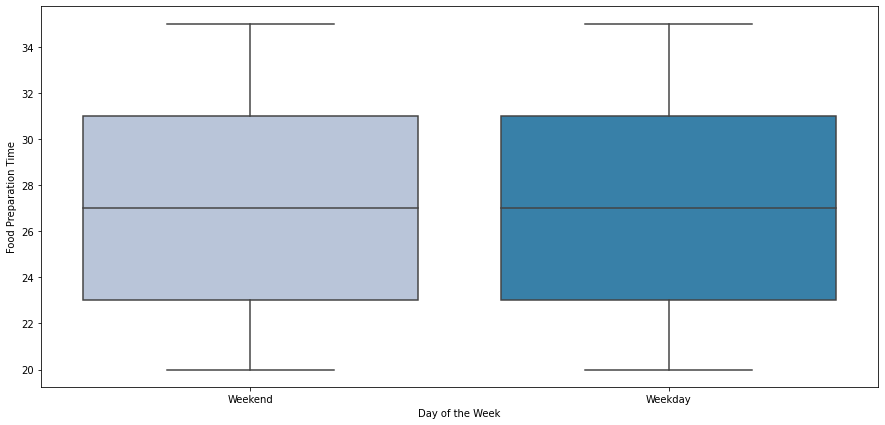

In [ ]:
# Relationship between day of the week and prep time
plt.figure(figsize=(15,7))
sns.boxplot(y = "food_preparation_time", x = "day_of_the_week", data = df, palette = 'PuBu')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')   ##  visualize the relationship between day of the week and delivery time using boxplot
plt.show()

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

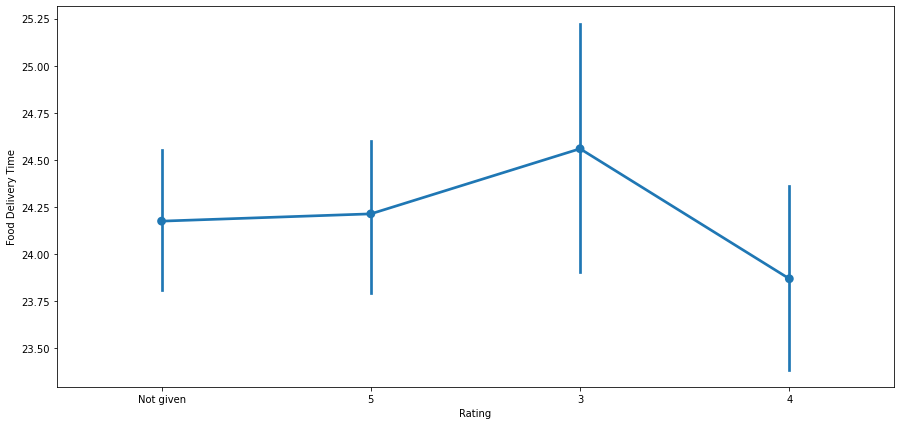

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.xlabel('Rating')
plt.ylabel('Food Delivery Time')
plt.show()

#### Rating vs Food preparation time

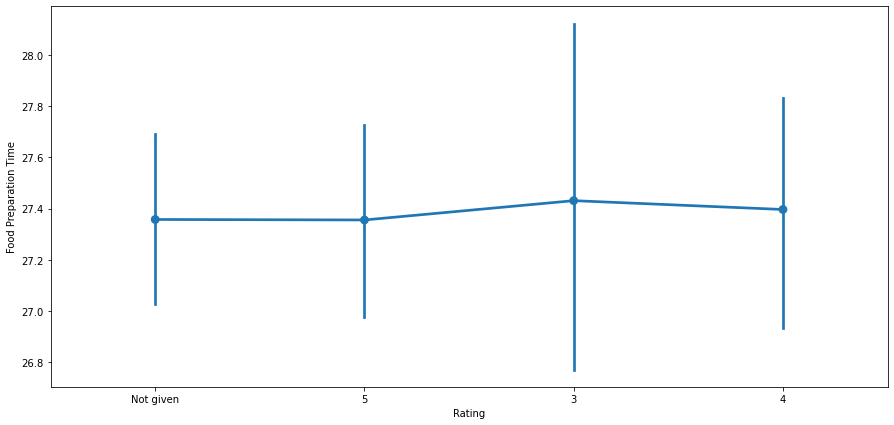

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')  ##  visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

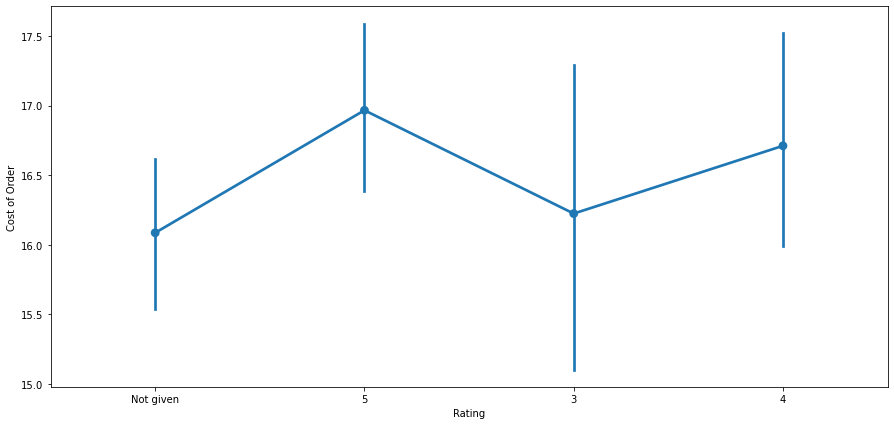

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df) 
plt.xlabel('Rating')
plt.ylabel('Cost of Order')  ##  visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

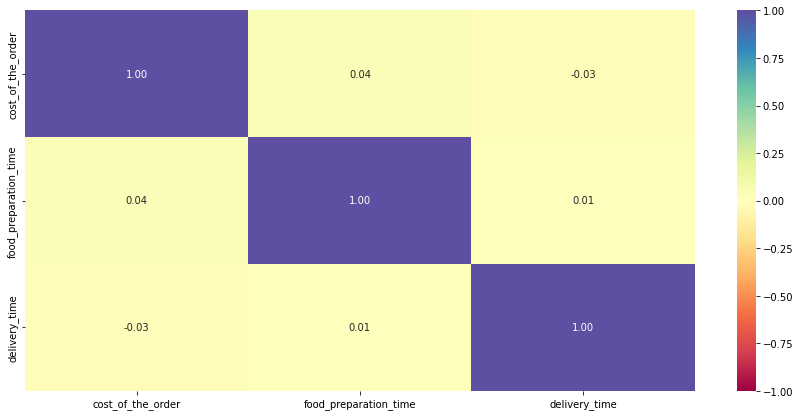

In [ ]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Relation between costs and day of week


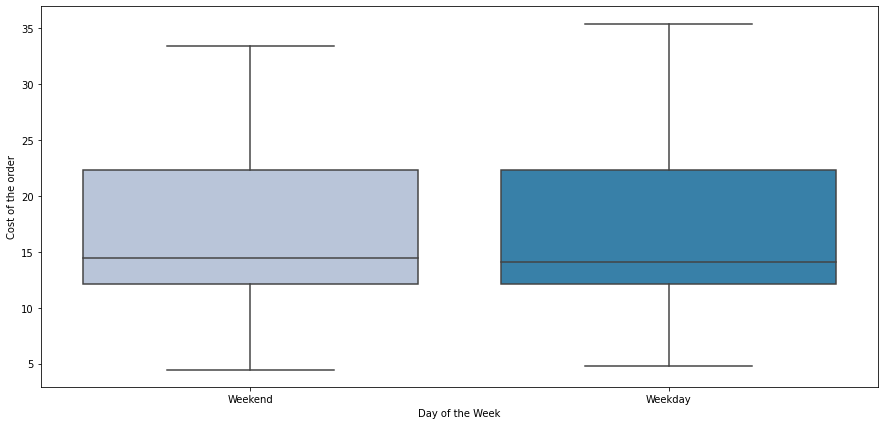

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(y = "cost_of_the_order", x = "day_of_the_week", data = df, palette = 'PuBu')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the order')   ##  visualize the relationship between day of the week and delivery time using boxplot
plt.show()

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


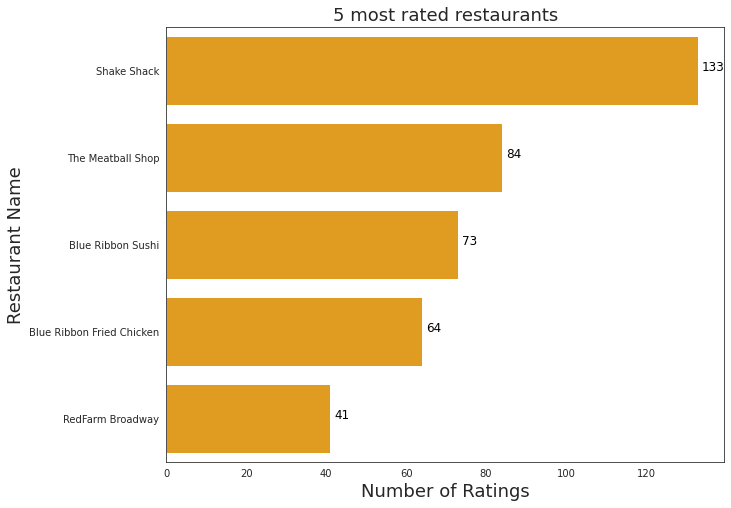

Text(0.5, 0, 'Restaurant')

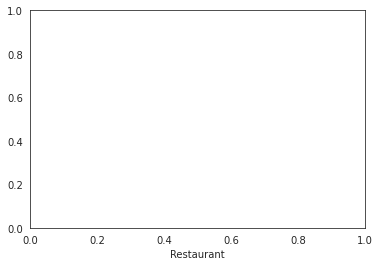

In [ ]:


# Set the number of top restaurants to display
N = 5

# Get a list of the top N restaurants based on the number of ratings
top_restaurants = df_rating_count.nlargest(N, 'rating')['restaurant_name'].tolist()

# Create a horizontal countplot using Seaborn
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y="restaurant_name", data=df_rated[df_rated['restaurant_name'].isin(top_restaurants)], ax=ax, order=top_restaurants, color='orange')

# Set the x-axis label and title
ax.set_xlabel("Number of Ratings", fontsize=18)
ax.set_ylabel("Restaurant Name", fontsize=18)
ax.set_title("5 most rated restaurants", fontsize=18)

# Add count labels to each bar
for i, v in enumerate(df_rating_count[df_rating_count['restaurant_name'].isin(top_restaurants)]['rating']):
    ax.text(v+1, i, str(v), color='black', fontsize=12)

# Show the plot
plt.show()
plt.xlabel('Restaurant')






In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ##  get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ##  find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


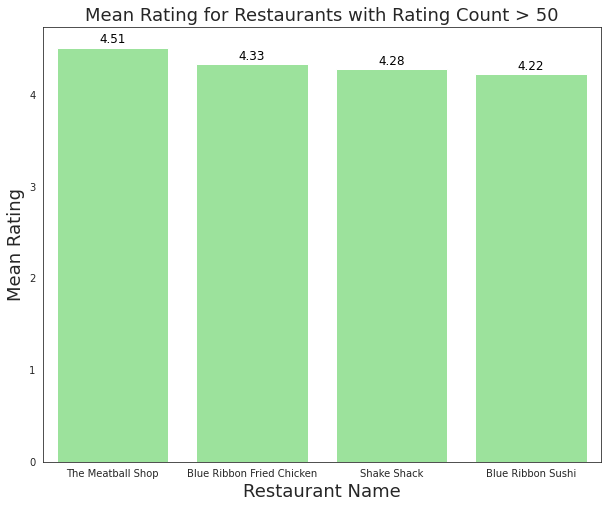

In [ ]:


# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_grouped = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

# Create a vertical barplot using Seaborn
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='restaurant_name', y='rating', data=df_mean_4_grouped, color='lightgreen')

# Set the x-axis label and title
ax.set_xlabel("Restaurant Name", fontsize=18)
ax.set_ylabel("Mean Rating", fontsize=18)
ax.set_title("Mean Rating for Restaurants with Rating Count > 50", fontsize=18)

# Add rating labels to each bar
for i, v in enumerate(df_mean_4_grouped['rating']):
    ax.text(i, v+0.05, str(round(v,2)), color='black', fontsize=12, ha='center')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=0)

# Show the plot
plt.show()

plt.show()






In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['Total Time'] = df['food_preparation_time'] + df['delivery_time']


## code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
# Get orders that take more than 60 minutes to be prepared AND delivered
df_greater_than_60 = df[df['Total Time']>60] ## appropriate column name to get the total time > 60 mins

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that take more than 60 mins to be prepared and delivered is:', df_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 60 minutes in food prep and delivery time:", round(percentage, 2), '%')




The number of total orders that take more than 60 mins to be prepared and delivered is: 200
Percentage of orders above 60 minutes in food prep and delivery time: 10.54 %


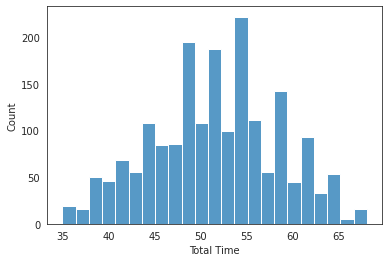

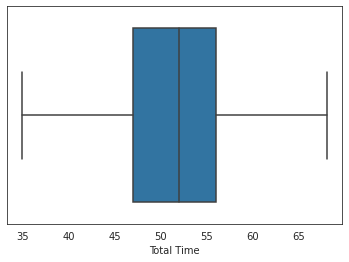

Text(0.5, 0, 'Food Delivery Time')

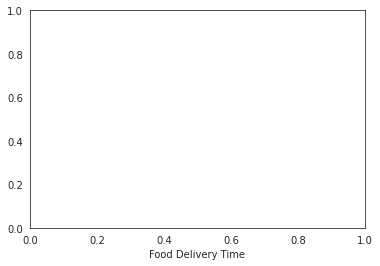

In [ ]:
sns.histplot(data=df,x='Total Time') ##  plot the histogram for the delivery time
plt.show()
plt.xlabel('Total Time')
sns.boxplot(data=df,x='Total Time') ##  plot the boxplot for the delivery time
plt.show()
plt.xlabel('Food Delivery Time')

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


---